In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
dataset = load_dataset("rtweera/nhanes-dataset-diabetes-classified-v3", split="train")
df = dataset.to_pandas()
df.shape

README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

diabetes-type-classified-v3.parquet:   0%|          | 0.00/183M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/101316 [00:00<?, ? examples/s]

(101316, 4929)

In [4]:
# selected_attributes_str
selected_attributes_str = """
ALQ120Q__questionnaire
ALQ120U__questionnaire
ALQ130__questionnaire
BMDBMIC__response
BMXBMI__response
BMXHT__response
BMXWAIST__response
BMXWT__response
BPD035__questionnaire
BPD110A__questionnaire
BPD110B__questionnaire
BPD110C__questionnaire
BPD120__questionnaire
BPD130__questionnaire
BPD140__questionnaire
BPQ020__questionnaire
BPQ040A__questionnaire
BPQ040B__questionnaire
BPQ040C__questionnaire
BPQ040D__questionnaire
BPQ040E__questionnaire
BPQ040F__questionnaire
BPQ043A__questionnaire
BPQ043B__questionnaire
BPQ043C__questionnaire
BPQ043D__questionnaire
BPQ050A__questionnaire
BPQ050B__questionnaire
BPQ050C__questionnaire
BPQ050D__questionnaire
BPQ050E__questionnaire
BPQ080__questionnaire
BPQ090A__questionnaire
BPQ090B__questionnaire
BPQ090C__questionnaire
BPQ090D__questionnaire
BPQ100A__questionnaire
BPQ100B__questionnaire
BPQ100C__questionnaire
BPQ100D__questionnaire
BPXCHR__response
BPXDAR__response
BPXPLS__response
BPXPULS__response
BPXSAR__response
CVDFITLV__response
DIABETES__mortality
DID040__questionnaire
DID040G__questionnaire
DID040Q__questionnaire
DID250__questionnaire
DID270__questionnaire
DID310D__questionnaire
DID310S__questionnaire
DID320__questionnaire
DID330__questionnaire
DIQ010__questionnaire
DIQ050__questionnaire
DIQ050__response
DIQ060__questionnaire
DIQ060G__questionnaire
DIQ060Q__questionnaire
DIQ060U__questionnaire
DIQ070__questionnaire
DIQ080__questionnaire
DIQ090__questionnaire
DIQ100__questionnaire
DIQ110__questionnaire
DIQ120__questionnaire
DIQ130__questionnaire
DIQ140__questionnaire
DIQ150__questionnaire
DIQ160__questionnaire
DIQ170__questionnaire
DIQ172__questionnaire
DIQ175A__questionnaire
DIQ175B__questionnaire
DIQ175C__questionnaire
DIQ175D__questionnaire
DIQ175E__questionnaire
DIQ175F__questionnaire
DIQ175G__questionnaire
DIQ175H__questionnaire
DIQ175I__questionnaire
DIQ175J__questionnaire
DIQ175K__questionnaire
DIQ175L__questionnaire
DIQ175M__questionnaire
DIQ175N__questionnaire
DIQ175O__questionnaire
DIQ175P__questionnaire
DIQ175Q__questionnaire
DIQ175R__questionnaire
DIQ175S__questionnaire
DIQ175T__questionnaire
DIQ175U__questionnaire
DIQ175V__questionnaire
DIQ175W__questionnaire
DIQ175X__questionnaire
DIQ180__questionnaire
DIQ220__questionnaire
DIQ230__questionnaire
DIQ260__questionnaire
DIQ260U__questionnaire
DIQ275__questionnaire
DIQ280__questionnaire
DIQ290__questionnaire
DIQ300D__questionnaire
DIQ300S__questionnaire
DMAETHNR__demographics
DMARACER__demographics
DMDBORN4__demographics
DMDMARTL__demographics
DMDSCHOL__demographics
DMPFSEQ__demographics
DRPNKA__dietary
DRPNKC__dietary
DRPNKF__dietary
DRPNKMF__dietary
DRPNKP__dietary
DRPNKPF__dietary
DRPNKSF__dietary
DRPNVAIU__dietary
DRQSDIET__dietary
DRQSDT1__dietary
DRQSDT10__dietary
DRQSDT11__dietary
DRQSDT12__dietary
DRQSDT2__dietary
DRQSDT3__dietary
DRQSDT4__dietary
DRQSDT5__dietary
DRQSDT6__dietary
DRQSDT7__dietary
DRQSDT8__dietary
DRQSDT9__dietary
DRQSDT91__dietary
DRX.320Z__dietary
DRXTALCO__dietary
DRXTCHOL__dietary
DRXTMAGN__dietary
DRXTSUGR__dietary
DRXTTFAT__dietary
ELIGSTAT__mortality
HAB4__questionnaire
HAC5A1__questionnaire
HAC5A10__questionnaire
HAC5A11__questionnaire
HAC5A12__questionnaire
HAC5A2__questionnaire
HAC5A3__questionnaire
HAC5A4__questionnaire
HAC5A5__questionnaire
HAC5A6__questionnaire
HAC5A7__questionnaire
HAC5A8__questionnaire
HAC5A9__questionnaire
HAD12S__questionnaire
HAD4__questionnaire
HAD7S__questionnaire
HAD8__questionnaire
HAE4B__questionnaire
HAE4C__questionnaire
HAE4D1__questionnaire
HAE4D2__questionnaire
HAE4D3__questionnaire
HAE4D4__questionnaire
HAE4D5__questionnaire
HAE4D6__questionnaire
HAE5A__questionnaire
HAE5B__questionnaire
HAE5C__questionnaire
HAE5D1__questionnaire
HAE5D2__questionnaire
HAE5D3__questionnaire
HAE5D4__questionnaire
HAE5D5__questionnaire
HAE5D6__questionnaire
HAE7__questionnaire
HAE8A__questionnaire
HAE8B__questionnaire
HAE8C__questionnaire
HAE8D__questionnaire
HAE9A__questionnaire
HAE9B__questionnaire
HAE9C__questionnaire
HAE9D__questionnaire
HAK10__questionnaire
HAK11__questionnaire
HAK2__questionnaire
HAK3A__questionnaire
HAK9__questionnaire
HAM11__questionnaire
HAM15A__questionnaire
HAM15B__questionnaire
HAM15C__questionnaire
HAM15D__questionnaire
HAM15Y__questionnaire
HAN1AS__questionnaire
HAN1BS__questionnaire
HAN1FS__questionnaire
HAN1GS__questionnaire
HAN1HS__questionnaire
HAN1IS__questionnaire
HAN2BS__questionnaire
HAN3AS__questionnaire
HAN3BS__questionnaire
HAN3DS__questionnaire
HAN3ES__questionnaire
HAN3FS__questionnaire
HAN4DS__questionnaire
HAN4ES__questionnaire
HAN5GS__questionnaire
HAN5HS__questionnaire
HAN5IS__questionnaire
HAN5JS__questionnaire
HAN5KS__questionnaire
HAN6AS__questionnaire
HAN6BS__questionnaire
HAN6CS__questionnaire
HAN6DS__questionnaire
HAN6ES__questionnaire
HAN6HS__questionnaire
HAN6IS__questionnaire
HAN6JS__questionnaire
HAN7BS__questionnaire
HAR10__questionnaire
HAR11R__questionnaire
HAR12S__questionnaire
HAR13__questionnaire
HAR16__questionnaire
HAR18AS__questionnaire
HAR18BS__questionnaire
HAR2__questionnaire
HAR24__questionnaire
HAR25__questionnaire
HAR27__questionnaire
HAR28__questionnaire
HAR3__questionnaire
HAR4S__questionnaire
HAR8__questionnaire
HAT10__questionnaire
HAT10MET__questionnaire
HAT11S__questionnaire
HAT12__questionnaire
HAT13S__questionnaire
HAT14__questionnaire
HAT18__questionnaire
HAT1S__questionnaire
HAT2__questionnaire
HAT20S__questionnaire
HAT3S__questionnaire
HAT7S__questionnaire
HAT9S__questionnaire
HSAGEU__demographics
HSAITMOR__demographics
HYPERTEN__mortality
LBDFBSI__response
LBDFERSI__response
LBDFSHSI__response
LBDHDD__response
LBDINSI__response
LBDLDL__response
LBDSALSI__response
LBDSBUSI__response
LBDSCHSI__response
LBDSPHSI__response
LBDSTBSI__response
LBDSTRSI__response
LBDSUASI__response
LBDTCSI__response
LBDTRSI__response
LBXAPB__response
LBXB12__chemicals
LBXBCD__chemicals
LBXBFOA__chemicals
LBXBPB__chemicals
LBXCOT__chemicals
LBXCP__response
LBXCRP__response
LBXFB__response
LBXGH__response
LBXGLT__response
LBXGLU__response
LBXGLUSI__response
LBXHCY__response
LBXHSCRP__response
LBXIN__response
LBXSAL__response
LBXSBU__response
LBXSC3SI__response
LBXSCH__response
LBXSCR__response
LBXSGL__response
LBXSKSI__chemicals
LBXSNASI__chemicals
LBXSOSSI__response
LBXSPH__response
LBXSTR__response
LBXSUA__response
LBXTC__response
LBXTR__response
LPP__response
MCD180B__questionnaire
MCD180C__questionnaire
MCD180D__questionnaire
MCD180E__questionnaire
MCD180F__questionnaire
MCD180L__questionnaire
MCD180M__questionnaire
MCD180N__questionnaire
MCQ080__questionnaire
MCQ080E__questionnaire
MCQ100__questionnaire
MCQ110__questionnaire
MCQ140__questionnaire
MCQ160B__questionnaire
MCQ160C__questionnaire
MCQ160D__questionnaire
MCQ160E__questionnaire
MCQ160F__questionnaire
MCQ160J__questionnaire
MCQ160L__questionnaire
MCQ160M__questionnaire
MCQ160N__questionnaire
MCQ170L__questionnaire
MCQ170M__questionnaire
MCQ300C__questionnaire
MCQ366A__questionnaire
MCQ366B__questionnaire
MCQ366D__questionnaire
MCQ371A__questionnaire
MCQ371B__questionnaire
MHPSI__response
MIP__response
MORTSTAT__mortality
MRP__response
PAD615__questionnaire
PAD630__questionnaire
PAD645__questionnaire
PAD660__questionnaire
PAD675__questionnaire
PAD680__questionnaire
PAQ650__questionnaire
PAQ655__questionnaire
PAQ665__questionnaire
PAQ670__questionnaire
PAQ746__questionnaire
PAQ748__questionnaire
RXDDRUG__medications
UCOD_LEADING__mortality
URXCOTT__chemicals
URXNAL__chemicals
URXUCD__chemicals
URXUCR__response
URXUMA__response
URXUMS__response
VNDIABETES__mortality
VNEGFR__response
VNEGFRADJ__response
VNELIGSTAT__mortality
VNLDHDLRATIO__response
VNSUMARS__chemicals
VNTOTHDRATIO__response
VNUCOD_LEADING__mortality
VNURXBFOA__chemicals
VNURXCLPF__chemicals
VNURXDONA__chemicals
VNURXFHPS__chemicals
VNURXFPEA__chemicals
VNURXGENX__chemicals
WTSOG2YR__response
RIDAGEYR__demographics
SEQN
Diabetes_Type
"""

In [5]:
attributes = selected_attributes_str.strip().split("\n")
len(attributes)

375

In [6]:
selected_attr_df = df[attributes]
selected_attr_df.shape

(101316, 375)

### Check index to decide to drop or not

In [28]:
selected_attr_df.index  # default range. Safe to drop

RangeIndex(start=0, stop=101316, step=1)

In [7]:
selected_attr_df.to_parquet("nhanes-selected-attributes-raw.parquet", index=False)

## Missing value percentages

In [12]:
# --- 1. Calculate the percentage of missing values ---
# df.isnull().sum() counts the missing values per column.
# / len(df) divides the count by the total number of rows.
# * 100 converts the proportion to a percentage.
missing_percentage = (selected_attr_df.isnull().sum() / len(selected_attr_df)) * 100
missing_percentage

ALQ120Q__questionnaire    65.393423
ALQ120U__questionnaire    76.669035
ALQ130__questionnaire     73.188835
BMDBMIC__response         89.914722
BMXBMI__response          12.641636
                            ...    
VNURXFPEA__chemicals      97.702239
VNURXGENX__chemicals      97.702239
WTSOG2YR__response        85.251096
RIDAGEYR__demographics     0.000000
Diabetes_Type              0.000000
Length: 374, dtype: float64

In [14]:
# --- 2. Create a new DataFrame for easy viewing ---
# Filters out columns with 0% missing values
missing_info = pd.DataFrame({
    'Missing Count': selected_attr_df.isnull().sum(),
    'Missing Percentage': missing_percentage.round(2)
}).sort_values(by='Missing Percentage', ascending=False)
missing_info

,Missing Count,Missing Percentage
BPQ043B__questionnaire,101305,99.99
DRQSDT5__dietary,101309,99.99
DRQSDT12__dietary,101306,99.99
DIQ175X__questionnaire,101307,99.99
DIQ175W__questionnaire,101297,99.98
...,...,...
DMDBORN4__demographics,84,0.08
VNELIGSTAT__mortality,0,0.00
ELIGSTAT__mortality,0,0.00
RIDAGEYR__demographics,0,0.00


### Missing threshold = 90%

In [18]:
dropping_candidates = missing_info[
    missing_info['Missing Percentage'] > 90
].index.tolist()
print(len(dropping_candidates))
dropping_candidates

240


['BPQ043B__questionnaire',
 'DRQSDT5__dietary',
 'DRQSDT12__dietary',
 'DIQ175X__questionnaire',
 'DIQ175W__questionnaire',
 'DRQSDT6__dietary',
 'HAE5D6__questionnaire',
 'DRQSDT11__dietary',
 'DRQSDT10__dietary',
 'HAE5D4__questionnaire',
 'HAE5D3__questionnaire',
 'DIQ175V__questionnaire',
 'HAR28__questionnaire',
 'HAD4__questionnaire',
 'HAE5D2__questionnaire',
 'DRQSDT8__dietary',
 'HAE5D5__questionnaire',
 'DIQ175R__questionnaire',
 'DRQSDT9__dietary',
 'DRQSDT4__dietary',
 'DIQ175K__questionnaire',
 'HAR18AS__questionnaire',
 'DIQ175S__questionnaire',
 'DIQ175F__questionnaire',
 'DRQSDT91__dietary',
 'HAR25__questionnaire',
 'HAR18BS__questionnaire',
 'DIQ220__questionnaire',
 'DIQ175L__questionnaire',
 'HAD7S__questionnaire',
 'HAD8__questionnaire',
 'DRQSDT3__dietary',
 'DIQ175I__questionnaire',
 'DRQSDT2__dietary',
 'DIQ175U__questionnaire',
 'DIQ060Q__questionnaire',
 'DIQ175T__questionnaire',
 'DIQ060G__questionnaire',
 'DIQ175N__questionnaire',
 'DRQSDT7__dietary',
 'HAE9

### Missing threshold = 70%

In [16]:
dropping_candidates = missing_info[
    missing_info['Missing Percentage'] > 70
].index.tolist()
print(len(dropping_candidates))
dropping_candidates

289


['BPQ043B__questionnaire',
 'DRQSDT5__dietary',
 'DRQSDT12__dietary',
 'DIQ175X__questionnaire',
 'DIQ175W__questionnaire',
 'DRQSDT6__dietary',
 'HAE5D6__questionnaire',
 'DRQSDT11__dietary',
 'DRQSDT10__dietary',
 'HAE5D4__questionnaire',
 'HAE5D3__questionnaire',
 'DIQ175V__questionnaire',
 'HAR28__questionnaire',
 'HAD4__questionnaire',
 'HAE5D2__questionnaire',
 'DRQSDT8__dietary',
 'HAE5D5__questionnaire',
 'DIQ175R__questionnaire',
 'DRQSDT9__dietary',
 'DRQSDT4__dietary',
 'DIQ175K__questionnaire',
 'HAR18AS__questionnaire',
 'DIQ175S__questionnaire',
 'DIQ175F__questionnaire',
 'DRQSDT91__dietary',
 'HAR25__questionnaire',
 'HAR18BS__questionnaire',
 'DIQ220__questionnaire',
 'DIQ175L__questionnaire',
 'HAD7S__questionnaire',
 'HAD8__questionnaire',
 'DRQSDT3__dietary',
 'DIQ175I__questionnaire',
 'DRQSDT2__dietary',
 'DIQ175U__questionnaire',
 'DIQ060Q__questionnaire',
 'DIQ175T__questionnaire',
 'DIQ060G__questionnaire',
 'DIQ175N__questionnaire',
 'DRQSDT7__dietary',
 'HAE9

### Missing threshold = 50%

In [19]:
dropping_candidates = missing_info[
    missing_info['Missing Percentage'] > 50
].index.tolist()
print(len(dropping_candidates))
dropping_candidates

314


['BPQ043B__questionnaire',
 'DRQSDT5__dietary',
 'DRQSDT12__dietary',
 'DIQ175X__questionnaire',
 'DIQ175W__questionnaire',
 'DRQSDT6__dietary',
 'HAE5D6__questionnaire',
 'DRQSDT11__dietary',
 'DRQSDT10__dietary',
 'HAE5D4__questionnaire',
 'HAE5D3__questionnaire',
 'DIQ175V__questionnaire',
 'HAR28__questionnaire',
 'HAD4__questionnaire',
 'HAE5D2__questionnaire',
 'DRQSDT8__dietary',
 'HAE5D5__questionnaire',
 'DIQ175R__questionnaire',
 'DRQSDT9__dietary',
 'DRQSDT4__dietary',
 'DIQ175K__questionnaire',
 'HAR18AS__questionnaire',
 'DIQ175S__questionnaire',
 'DIQ175F__questionnaire',
 'DRQSDT91__dietary',
 'HAR25__questionnaire',
 'HAR18BS__questionnaire',
 'DIQ220__questionnaire',
 'DIQ175L__questionnaire',
 'HAD7S__questionnaire',
 'HAD8__questionnaire',
 'DRQSDT3__dietary',
 'DIQ175I__questionnaire',
 'DRQSDT2__dietary',
 'DIQ175U__questionnaire',
 'DIQ060Q__questionnaire',
 'DIQ175T__questionnaire',
 'DIQ060G__questionnaire',
 'DIQ175N__questionnaire',
 'DRQSDT7__dietary',
 'HAE9

### Plot

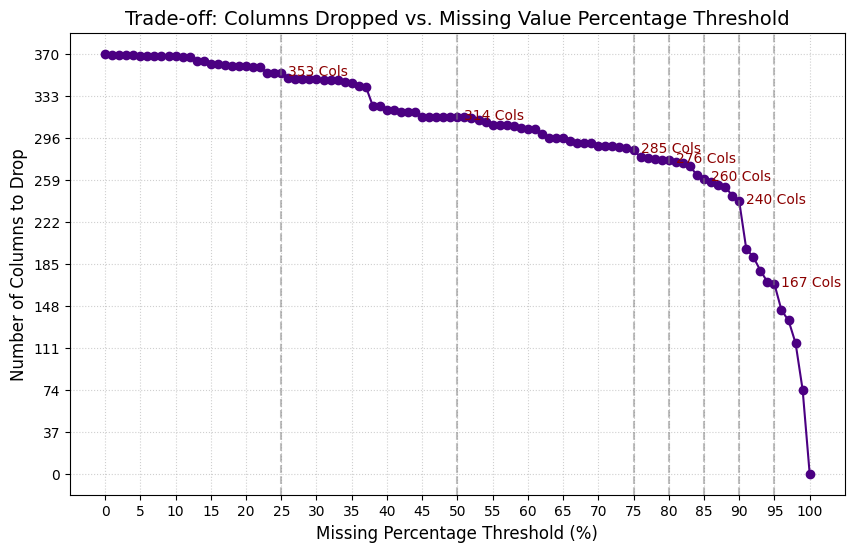

In [21]:
# --- 1. Calculate the percentage of missing values for all columns ---
missing_percentage = (selected_attr_df.isnull().sum() / len(selected_attr_df)) * 100

# Filter out columns with 0% missing, as they don't affect the dropping decision
missing_percentage = missing_percentage[missing_percentage > 0]

# --- 2. Define thresholds and calculate the number of columns to drop at each threshold ---
# Create a range of thresholds from 0% to 100% in 1% steps
thresholds = np.arange(0, 101, 1)
columns_to_drop_count = []

for threshold in thresholds:
    # Count how many columns have a missing percentage GREATER THAN or equal to the current threshold
    count = (missing_percentage >= threshold).sum()
    columns_to_drop_count.append(count)

# --- 3. Create the Visualization DataFrame ---
plot_df = pd.DataFrame({
    'Threshold (%)': thresholds,
    'Columns to Drop Count': columns_to_drop_count
})

# --- 4. Generate the Line Graph ---
plt.figure(figsize=(10, 6))
plt.plot(plot_df['Threshold (%)'], plot_df['Columns to Drop Count'], marker='o', linestyle='-', color='indigo')

# Add labels and title
plt.title('Trade-off: Columns Dropped vs. Missing Value Percentage Threshold', fontsize=14)
plt.xlabel('Missing Percentage Threshold (%)', fontsize=12)
plt.ylabel('Number of Columns to Drop', fontsize=12)

# Highlight a few key thresholds for context
for x_val in [25, 50, 75, 80, 85, 90, 95]:
    y_val = plot_df[plot_df['Threshold (%)'] == x_val]['Columns to Drop Count'].iloc[0]
    plt.axvline(x=x_val, color='grey', linestyle='--', alpha=0.5)
    plt.text(x_val + 1, y_val - 2, f'{y_val} Cols', rotation=0, color='darkred')

plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(np.arange(0, 101, 5))
plt.yticks(np.arange(0, plot_df['Columns to Drop Count'].max() + 1, max(1, (plot_df['Columns to Drop Count'].max() // 10))))
plt.show()

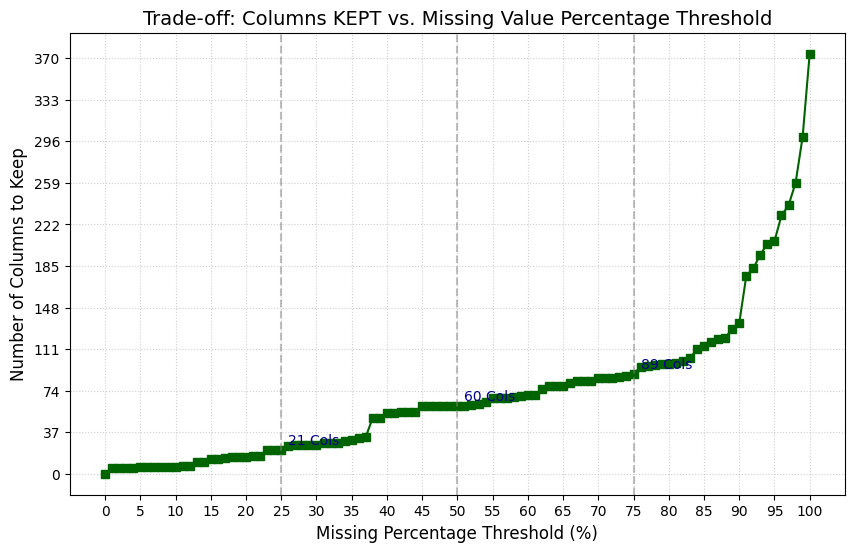

In [23]:
# --- 1. Calculate the percentage of missing values for all columns ---
missing_percentage = (selected_attr_df.isnull().sum() / len(df)) * 100

# Get the total number of columns in the original DataFrame (374 in your case)
total_columns = len(selected_attr_df.columns)

# --- 2. Define thresholds and calculate the number of columns to KEEP at each threshold ---
thresholds = np.arange(0, 101, 1)
columns_to_keep_count = []

for threshold in thresholds:
    # A column is KEPT if its missing percentage is STRICTLY LESS THAN the threshold.
    # We invert the drop logic: Keep if (missing_percentage < threshold)
    # OR, calculate the number to drop and subtract from the total:
    
    # 2a. Calculate how many columns are DROPPED (missing_percentage >= threshold)
    count_to_drop = (missing_percentage >= threshold).sum()
    
    # 2b. Calculate how many columns are KEPT (Total Columns - Count Dropped)
    count_to_keep = total_columns - count_to_drop
    columns_to_keep_count.append(count_to_keep)


# --- 3. Create the Visualization DataFrame ---
plot_df_keep = pd.DataFrame({
    'Threshold (%)': thresholds,
    'Columns to Keep Count': columns_to_keep_count
})

# --- 4. Generate the Line Graph (Upward Sloping) ---
plt.figure(figsize=(10, 6))
plt.plot(plot_df_keep['Threshold (%)'], plot_df_keep['Columns to Keep Count'], marker='s', linestyle='-', color='darkgreen')

# Add labels and title
plt.title('Trade-off: Columns KEPT vs. Missing Value Percentage Threshold', fontsize=14)
plt.xlabel('Missing Percentage Threshold (%)', fontsize=12)
plt.ylabel('Number of Columns to Keep', fontsize=12)

# Highlight a few key thresholds for context
for x_val in [25, 50, 75]:
    y_val = plot_df_keep[plot_df_keep['Threshold (%)'] == x_val]['Columns to Keep Count'].iloc[0]
    plt.axvline(x=x_val, color='grey', linestyle='--', alpha=0.5)
    plt.text(x_val + 1, y_val + 5, f'{y_val} Cols', rotation=0, color='darkblue')

plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(np.arange(0, 101, 5))
plt.yticks(np.arange(0, total_columns + 1, max(1, (total_columns // 10))))

plt.show()